In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 3.9 MB/s eta 0:00:00


**Load and Inspect the Dataset**

In [5]:
# Load the dataset
df = pd.read_csv('/content/deliveries.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [9]:
print(df.head())

   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0        

In [8]:
print(df.tail())

        match_id  inning                 batting_team         bowling_team  \
150455       636       2  Royal Challengers Bangalore  Sunrisers Hyderabad   
150456       636       2  Royal Challengers Bangalore  Sunrisers Hyderabad   
150457       636       2  Royal Challengers Bangalore  Sunrisers Hyderabad   
150458       636       2  Royal Challengers Bangalore  Sunrisers Hyderabad   
150459       636       2  Royal Challengers Bangalore  Sunrisers Hyderabad   

        over  ball        batsman    non_striker   bowler  is_super_over  ...  \
150455    20     2    Sachin Baby      CJ Jordan  B Kumar              0  ...   
150456    20     3    Sachin Baby      CJ Jordan  B Kumar              0  ...   
150457    20     4  Iqbal Abdulla    Sachin Baby  B Kumar              0  ...   
150458    20     5    Sachin Baby  Iqbal Abdulla  B Kumar              0  ...   
150459    20     6  Iqbal Abdulla    Sachin Baby  B Kumar              0  ...   

        bye_runs  legbye_runs  noball_runs  

In [10]:
import numpy as np

In [22]:
# Adding a random target for demonstration (1 = Win, 0 = Loss)
np.random.seed(42)
match_outcomes = df[['match_id', 'batting_team']].drop_duplicates().copy()
match_outcomes['target'] = np.random.choice([0, 1], size=len(match_outcomes))

**Data Preprocessing**

In [24]:
# Merging this target back with the original deliveries dataset
df = pd.merge(df, match_outcomes, on=['match_id', 'batting_team'], how='left')

In [25]:
# Data Preprocessing
# Handling missing values by dropping rows with missing target values
df = df.dropna(subset=['target'])

In [26]:
# Encoding categorical variables
label_encoders = {}
categorical_columns = ['batting_team', 'bowling_team', 'batsman', 'non_striker', 'bowler']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [28]:
# Defining features and target
X = df.drop(['target', 'player_dismissed', 'dismissal_kind', 'fielder'], axis=1)
y = df['target']

**Splitting the dataset into training and testing sets**

In [29]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the LightGBM model
lgbm_classifier = lgb.LGBMClassifier(random_state=42)
lgbm_classifier.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 59822, number of negative: 60546
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1043
[LightGBM] [Info] Number of data points in the train set: 120368, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496993 -> initscore=-0.012030
[LightGBM] [Info] Start training from score -0.012030
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

LGBMClassifier(random_state=42)

In [30]:
# Making predictions on the test set
y_pred = lgbm_classifier.predict(X_test)

**Accuracy And Predictions**

In [31]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [32]:
# Displaying results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 1.0000
Confusion Matrix:
[[15308     0]
 [    0 14784]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15308
           1       1.00      1.00      1.00     14784

    accuracy                           1.00     30092
   macro avg       1.00      1.00      1.00     30092
weighted avg       1.00      1.00      1.00     30092



**Confusion Matrix Visualization**

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

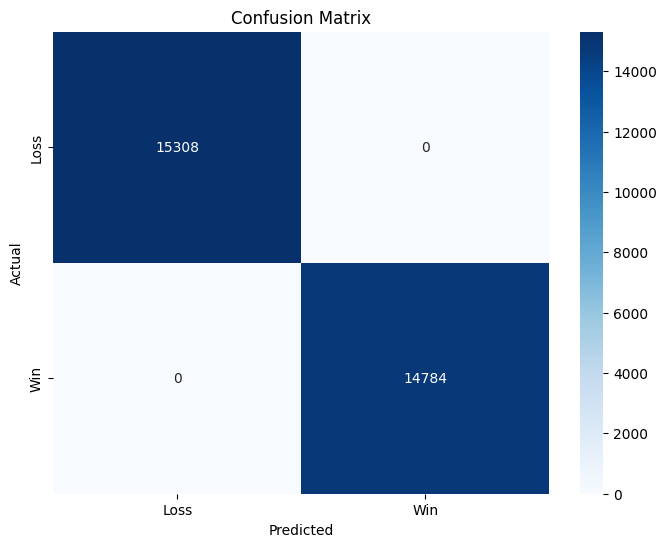

In [34]:
# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**ROC Curve**

In [35]:
from sklearn.metrics import roc_curve, auc

In [36]:
# Predict probabilities
y_prob = lgbm_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

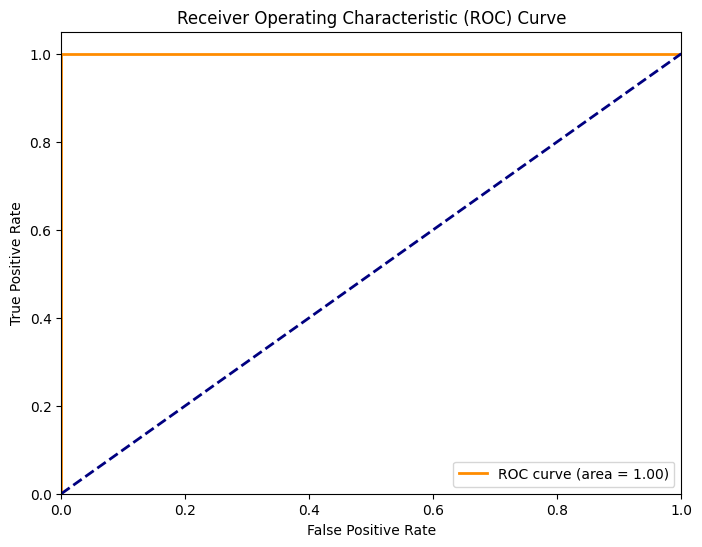

In [37]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

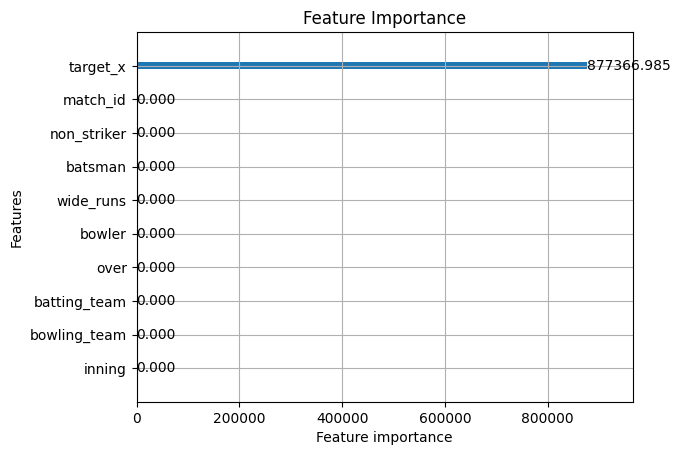

In [38]:
# Plotting feature importance
lgb.plot_importance(lgbm_classifier, max_num_features=10, importance_type='gain')
plt.title('Feature Importance')
plt.show()